
# Homework 10.5: Python: Dipole Animation

The purpose of this problem is study the Electric Field due to a dipole at different distances from the dipole as the separation between the two charges changes. As a reminder, the electric field due to a point charge is:

$$\vec{E} = k q \left [ \frac{\vec{r}_\mathrm{observation} - \vec{r}_\mathrm{source}}{\left |  \vec{r}_\mathrm{observation} - \vec{r}_\mathrm{source}\right |^3} \right ] $$

This excercise will also provide you with an opportunity to learn how to make an animated gif. The generation of the animation make take some time (a few minutes) depending on your computer so please be patient. The output is an animated gif file named "temp.gif" - this file can be openned in a web browser for viewing. If your computer is fast enough, then you can see the animation in real time within the notebook. Otherwise, viewing the animated gif file in a web browswer may be the better option.

In [9]:
# will need this to determine how long it takes to generate the animation
from datetime import datetime

# importing numpy and matplotlib array manipulation and plotting/animation libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

#enable interactive plot in the notebook
%matplotlib notebook

# Create new Figure with the appropriate size
fig = plt.figure(figsize = (12,4))

# this is the function that is called to generate each frame of the animation
# there are two parts - first the locations of the charges are displayed as red (positive) and blue (negative dots)
# second the electric field lines are calculated and plotted as "stream lines"
# 
# frame_number is the variable that is being updated within each frame
# in this case, it is related to the location of the charges
#
def update(frame_number):
    
    # location of the positive charge (r_source vector for + charge)
    xp = 0.0
    yp = +2.0*(1.05-np.sin(frame_number))

    # location of the negative charge (r_source vector for - charge)
    xm = 0.0
    ym = -2.0*(1.05-np.sin(frame_number))
        
    # clearing out the previous plot and setting the axes limits    
    plt.clf()
    plt.axes(xlim = (-12.0,+12.0), ylim = (-4.0,+4.0))
    
    # plotting the location of the positive (red) and negative (blue) charges
    plt.plot(xp,yp,'ro',scalex = False, scaley = False)
    plt.plot(xm,ym,'bo',scalex = False, scaley = False)
    
    # creating a 2D mesh of points where the electric fields should be calculated  (r_observation vectors)
    xarray = np.linspace(-12.0,+12.0,100)
    yarray = np.linspace(-4.0,+4.0,100)
    X,Y = np.meshgrid(xarray,yarray)
    
    # defining the constants needed for calculating the electric fields
    # note that the magnitude of the charge changes as the distance between the charges changes
    # this is to keep the electric dipole moment of this system constant
    k = 9.0E9
    q = 1.0E-6*(4.0/np.abs(yp-ym))

    # in order to plot the electric field stream lines, we need to calculate the two components of the electric field separately
    # you will need to fill this part in - remember the definition of Griffiths script-r: (observation point) - (source location)
    # Epx = x-component of the electric field due to the positive charge
    # Epy = y-component of the electric field due to the positive charge
    Epx = k*q*(X-xp)/((X-xp)**2+(Y-yp)**2)**(3/2)
    Epy = k*q*(Y-yp)/((X-xp)**2+(Y-yp)**2)**(3/2)

    # Emx = x-component of the electric field due to the negative charge
    # Emy = y-component of the electric field due to the negative charge
    Emx = -k*q*(X-xm)/((X-xm)**2+(Y-ym)**2)**(3/2)
    Emy = -k*q*(Y-ym)/((X-xm)**2+(Y-ym)**2)**(3/2)

    # Ex = x-component of the total electric field
    # Ey = y-component of the total electric field
    Ex = Epx + Emx
    Ey = Epy + Emy
    
    # setting the color of the arrows in the streamline plot to be scaled to the electric field magnitude
    arrowcolor = np.log(Ex**2 + Ey**2)

    # plotting the electric field lines
    plt.streamplot(X,Y,Ex,Ey,linewidth = 1,color = arrowcolor, arrowstyle = '->' , density = 2.0, arrowsize = 2.0)
    


<IPython.core.display.Javascript object>

## Problems to Solve
**Calculate the Electric Fields:**  Put in the correct formulas into the code above for the x and y components of the electric field due to the positive charge (Epx and Epy) and the negative charge (Emx and Emy) as well as for the total electric field (Ex and Ey). In the template file, all are set to X and Y as placeholders.

Upload on D2L both the Jupyter notebook file and the animated gif file.

In [10]:
# setting the number of frames in the animation 
maxframes = 10

# getting the current time in order to calculate the total animation generation duration
t1 = datetime.now()

# creates the animation, each frame corresponds to a different charge separation
ani = FuncAnimation(fig, update, frames = np.linspace(0,np.pi,maxframes), interval=10)
plt.show()

# saves the animation as an animated gif
ani.save("final.gif", writer='imagemagick')

# getting the current time after the animation generation
t2 = datetime.now()

# letting you know that the animation is done and the time it took to generate it
print("done: ",t2-t1)

MovieWriter imagemagick unavailable; using Pillow instead.


<IPython.core.display.Javascript object>

done:  0:01:04.925225


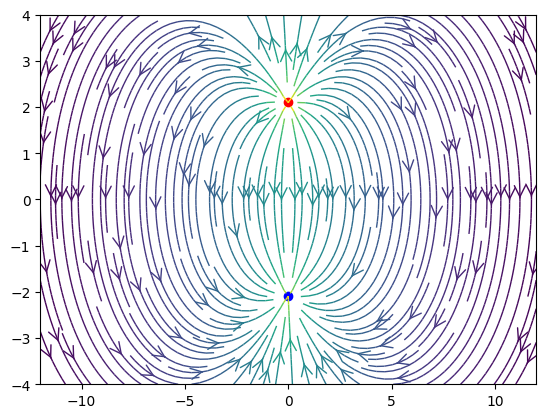

In [ ]:
from IPython.display import HTML
HTML(ani.to_jshtml())

In [17]:
import sympy as sp

#integrate over theta from 0 to pi
theta = sp.symbols('theta')

sp.integrate(sp.sin(theta)*sp.cos(theta)*sp.sin(3*theta/2), (theta, 0, sp.pi))

4/7